<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M4_AST_11_Prompt_Engineering_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 11: Prompt Engineering

## Objective

Experience how different prompt engineering techniques can shape the quality, accuracy, and usefulness of AI outputs. The goal is to highlight how thoughtful prompt design enhances reasoning, creativity, and control compared to generic prompting.

## Information

**Prompt** is the input you give to an AI model—a piece of text, instruction, or query that tells the model what you want it to do.

---

**Prompt Engineering** is the practice of carefully designing, crafting, and refining the ***input*** ("prompts") given to generative AI models to achieve desired ***outputs***. It involves using clear language, context, and instructions to guide the AI toward producing relevant, accurate, and specific responses, much like providing a roadmap or detailed instructions to someone.

---

**Elements of a Prompt**

A prompt contains any of the following elements:

- **Instruction** - a specific task or instruction you want the model to perform

- **Context** - external information or additional context that can steer the model to better responses

- **Input Data** - the input or question that we are interested to find a response for

- **Output Indicator** - the type or format of the output.

---

### Setup Steps:

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M4_AST_11_Prompt_Engineering_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword(),"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support,"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Install Required Packages

In [4]:
import os
import base64
from PIL import Image
from io import BytesIO
from openai import OpenAI

### **Read the OpenAI API Key**

* Use an existing OpenAI API key, or Create a new one by visiting: https://platform.openai.com/api-keys

* Save the key in Google Colab's Secrets

* Read the key and save as an environment variable `OPENAI_API_KEY`

In [19]:
# Save the key in Colab's Secrets then load from there

from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

### **Create OpenAI client**

In [20]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

## **1) Zero-Shot Prompting**

Large language models (LLMs) today, such as GPT-3.5 Turbo, GPT-4, and Claude 3, are tuned to follow instructions and are trained on large amounts of data. Large-scale training makes these models capable of performing some tasks in a "zero-shot" manner. Zero-shot prompting means that the prompt used to interact with the model won't contain examples or demonstrations. **The zero-shot prompt directly instructs the model to perform a task without any additional examples to steer it.**

Here is one of example for text classification:

Prompt:

```
Classify the text into neutral, negative or positive.
Text: I think the vacation is okay.
Sentiment:
```

**Let's try the above prompt with the below two ways:**

- Using OpenAI Chat Playground: https://platform.openai.com/chat
- Using API call (code cells are present below)



<br>


---
---

#### **i) Using [OpenAI Chat Playground](https://platform.openai.com/chat)**

<br>


![OpenAI Image Playground - Bottle image](https://drive.google.com/uc?id=1PUKkTL41EsG5owxIs5Qp8oDmcsPBEjnZ)

---

#### **ii) Using API call**

In [21]:
prompt = """Classify the text into neutral, negative or positive.
Text: I think the vacation is okay.
Sentiment:
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": prompt}
    ]
)

print(response.choices[0].message.content)

Sentiment: Neutral


When zero-shot doesn't work, it's recommended to provide demonstrations or examples in the prompt which leads to few-shot prompting.

## **2) Few-Shot Prompting**

While large-language models demonstrate remarkable zero-shot capabilities, they still fall short on more complex tasks when using the zero-shot setting. Few-shot prompting can be used as a technique to enable in-context learning where we provide demonstrations in the prompt to steer the model to better performance. The demonstrations serve as conditioning for subsequent examples where we would like the model to generate a response.

Here is one of example for text classification:

Prompt:

```
This is awesome! // Positive
This is bad! // Negative
Wow that movie was rad! // Positive
What a horrible show! //
```


#### **i) Using [OpenAI Chat Playground](https://platform.openai.com/chat)**

<br>

![OpenAI Image Playground - Edited Bottle image](https://drive.google.com/uc?id=1IYMjP7RSSG9nJjwSReGyEJNX4VGmwFpi)

---

#### **ii) Using API call**

In [22]:
prompt = """This is awesome! // Positive
This is bad! // Negative
Wow that movie was rad! // Positive
What a horrible show! //
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": prompt}
    ]
)

print(response.choices[0].message.content)

This is awful! // Negative


Standard few-shot prompting works well for many tasks but is still not a perfect technique, especially when dealing with more complex reasoning tasks.

When zero-shot prompting and few-shot prompting are not sufficient, it might mean that whatever was learned by the model isn't enough to do well at the task. From here it is recommended to start thinking about fine-tuning your models or experimenting with more advanced prompting techniques.

## **3) Chain-of-Thought (CoT) Prompting**

<img src='https://www.promptingguide.ai/_next/image?url=%2F_next%2Fstatic%2Fmedia%2Fcot.1933d9fe.png&w=1080&q=75' width=800px>

[Image Source](https://arxiv.org/abs/2201.11903)


Introduced in [Wei et al. (2022)](https://arxiv.org/abs/2201.11903), chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps. You can combine it with few-shot prompting to get better results on more complex tasks that require reasoning before responding.

For example:

Prompt:

```
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?
Let's think step by step.
```


#### **i) Using [OpenAI Chat Playground](https://platform.openai.com/chat)**


![OpenAI Image Playground - Edited Bottle image](https://drive.google.com/uc?id=17JgB86znptM95g3gBDB8iz5XeU9MLKBY)

---


#### **ii) Using API call**

In [23]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
I then went and bought 5 more apples and ate 1. How many apples did I remain with?
Let's think step by step.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": prompt}
    ]
)

print(response.choices[0].message.content)

Sure! Let's break it down step by step.

1. You initially bought **10 apples**.
2. You gave **2 apples** to your neighbor. Therefore, 
   \[
   10 - 2 = 8 \text{ apples remaining}
   \]
3. You gave **2 apples** to the repairman. Therefore, 
   \[
   8 - 2 = 6 \text{ apples remaining}
   \]
4. Then, you bought **5 more apples**. Therefore, 
   \[
   6 + 5 = 11 \text{ apples remaining}
   \]
5. You ate **1 apple**. Therefore, 
   \[
   11 - 1 = 10 \text{ apples remaining}
   \]

Thus, you have **10 apples** remaining.


## **4) System Prompts** $\quad$ (Assigning a Role)

A system prompt is a hidden or background instruction given to an AI model that sets the rules, behavior, or persona of the AI before it responds to user queries.

- It’s not usually visible to the end-user.
- It defines how the AI should think, respond, and behave.
- It acts like the “ground rules” or operating instructions for the AI.

**Difference from User Prompt**

- **System Prompt:** Defines the AI’s role, style, and boundaries. (invisible, set by developers or platform)
- **User Prompt:** The actual question or instruction given by the user.

**Why It Matters**

- Ensures consistent AI behavior across users.
- Prevents harmful, biased, or off-topic outputs.
- Useful for persona-based AI (e.g., tutor, lawyer, doctor assistant).


For Example:

System Prompt:
```
You are a very smart physics professor.
You are great at answering questions about physics in a concise and easy to understand manner.
When you don't know the answer to a question you admit that you don't know.
Start your answer with `Subject:Physics :`
```

Prompt:
```
What is black body radiation?
```

#### **i) Using [OpenAI Chat Playground](https://platform.openai.com/chat)**


![OpenAI Image Playground - Edited Bottle image](https://drive.google.com/uc?id=1Auuo4RZilZmUN80Xh0JQsNEbyyRLibHY)

---


#### **ii) Using API call**

In [25]:
system_prompt = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise and easy to understand manner. \
When you don't know the answer to a question you admit that you don't know.
Start your answer with `Subject:Physics :`
"""

prompt = "What is black body radiation?"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt}
    ]
)

print(response.choices[0].message.content)

Subject:Physics : 

Black body radiation refers to the electromagnetic radiation emitted by an idealized object known as a "black body." A black body is an ideal thermal emitter that absorbs all incident radiation, regardless of frequency or angle, and re-emits energy perfectly across all wavelengths.

The key characteristics of black body radiation are:

1. **Temperature Dependence**: The spectrum of the radiation emitted by a black body depends solely on its temperature. As the temperature increases, the peak of the emitted radiation shifts to shorter wavelengths (this is described by Wien's Displacement Law).

2. **Planck's Law**: The distribution of the radiation emitted is given by Planck's Law, which provides the spectral energy density of radiation as a function of wavelength and temperature. This law led to significant advancements in quantum mechanics.

3. **Stefan-Boltzmann Law**: The total amount of energy radiated per unit surface area of a black body is proportional to the

In [26]:
prompt2 = "What is Vibe Coding?"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt2}
    ]
)

print(response.choices[0].message.content)

Subject: Physics : I'm sorry, but I don't have information on "Vibe Coding" as it doesn't seem to be related to physics or any established scientific concept that I'm familiar with. It may refer to a specific programming language, software, or technique that emerged after my last update in October 2023. If you can provide more context or clarify the term, I might be able to assist you better!


## **5) Prompt Chaining**

To improve the reliability and performance of LLMs, one of the important prompt engineering techniques is to ***break tasks into its subtasks***. Once those subtasks have been identified, the LLM is prompted with a subtask and then its ***response is used as input to another prompt***. This is what's referred to as prompt chaining, where a task is split into subtasks with the idea to create a chain of prompt operations.

Prompt chaining is useful to accomplish complex tasks which an LLM might struggle to address if prompted with a very detailed prompt. In prompt chaining, chain prompts perform transformations or additional processes on the generated responses before reaching a final desired state.

Besides achieving better performance, prompt chaining helps to boost the transparency of your LLM application, increases controllability, and reliability. This means that you can debug problems with model responses much more easily and analyze and improve performance in the different stages that need improvement.

Prompt chaining is particularly useful when building LLM-powered conversational assistants and improving the personalization and user experience of your applications.


**For Example:** Let us consider an example to see how a large task—writing a blog post on remote work—can be broken into smaller steps using Prompt Chaining.

- First, the AI generates a blog outline,
- then expands one section into detailed text,
- summarizes that section into concise bullet points, and
- finally creates a persuasive call-to-action.

This step-by-step approach ensures clarity, structure, and refined outputs instead of trying to get everything in a single prompt.


In [27]:
# Step 1 – Generate an Outline

outline_prompt = "Create a 5-point outline for a blog post on the benefits of remote work."

outline = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": outline_prompt}
    ]
).choices[0].message.content

print(outline)

### Outline for a Blog Post on the Benefits of Remote Work

#### I. Introduction
   - Brief overview of the growing trend of remote work.
   - Mention of the impact of the COVID-19 pandemic on work styles.
   - Purpose of the post: to explore the benefits of remote work for employees and employers.

#### II. Improved Work-Life Balance
   - Explanation of how remote work allows for flexible scheduling.
   - Discussion on reduced commute time and the positive effects on personal time.
   - Anecdotes or statistics showcasing enhanced employee satisfaction and well-being.

#### III. Increased Productivity and Focus
   - Exploration of how remote work minimizes distractions often found in traditional office environments.
   - Highlight instances where employees experience enhanced concentration and efficiency.
   - Incorporation of studies linking remote work to higher productivity levels.

#### IV. Cost Savings for Both Employees and Employers
   - Breakdown of financial benefits for emplo

In [28]:
# Step 2 – Expand a Section

expand_prompt = "Expand point #II into a 120-word explanation with real-life examples."

point2_explaination = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": outline_prompt},
        {"role": "assistant", "content": outline},
        {"role": "user", "content": expand_prompt},
    ]
).choices[0].message.content

print(point2_explaination)

### II. Improved Work-Life Balance

Remote work significantly enhances work-life balance by providing employees with the flexibility to manage their time effectively. For instance, parents can adjust their schedules to accommodate school drop-offs and pick-ups, allowing them to be more present in their children's lives. A survey conducted by FlexJobs found that 73% of remote workers cite a better work-life balance as a primary benefit. Additionally, employees like Sarah, a graphic designer, report reduced stress from not having to commute, which gives her extra hours to pursue hobbies and fitness. This balance not only boosts morale but also reduces burnout, enabling employees to recharge and remain engaged in their roles. Ultimately, this flexibility leads to a happier, more productive workforce.


In [29]:
# Step 3 – Create a Summary

summary_prompt = "Summarize this section in 2 bullet points for a presentation slide."

point2_summary = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": outline_prompt},
        {"role": "assistant", "content": outline},
        {"role": "user", "content": expand_prompt},
        {"role": "assistant", "content": point2_explaination},
        {"role": "user", "content": summary_prompt},
    ]
).choices[0].message.content

print(point2_summary)

- **Enhanced Flexibility:** Remote work allows employees to manage their schedules, accommodating personal responsibilities such as childcare, leading to increased presence in their personal lives. 

- **Reduced Stress and Increased Engagement:** Eliminating daily commutes contributes to lower stress levels and burnout, fostering a happier and more productive workforce.


In [31]:
# Step 4 – Add a Call-to-Action

call_to_action_prompt = "Write a closing call-to-action encouraging companies to adopt remote work policies."

call_to_action = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": outline_prompt},
        {"role": "assistant", "content": outline},
        {"role": "user", "content": expand_prompt},
        {"role": "assistant", "content": point2_explaination},
        {"role": "user", "content": summary_prompt},
        {"role": "assistant", "content": point2_summary},
        {"role": "user", "content": call_to_action_prompt},
    ]
).choices[0].message.content

print(call_to_action)

As we navigate the future of work, it's crucial for companies to embrace the benefits of remote work. By adopting flexible remote work policies, you not only enhance employee satisfaction and productivity but also position your organization as a forward-thinking leader in the competitive landscape. Take the initiative today—explore how remote work can benefit your team and contribute to a healthier work culture. Engage with your employees, gather feedback, and start implementing strategies that support remote work. Let’s create a work environment that prioritizes both professional excellence and personal well-being. Join the movement towards innovative work solutions; the future is remote!


## **6) Using an LLM to provide Prompt**

Instead of framing the prompt ourself, we can ask an LLM to create a detailed prompt that can be used to get the desired response.

**For Example:** We can use an LLM like `gpt-4o` to provide a detailed prompt for creating an image. Then, feed this prompt to `gpt-image-1` for image generation.


**Model for Image Generation:** GPT Image (`gpt-image-1`)

This OpenAI model has world knowledge and can ***generate images*** leveraging this broad understanding of the world. It is also much better at instruction following and producing photorealistic images compared to previous-generation image models, DallE 2 and 3.


**Two ways to access this model:**

- Using OpenAI Images Playground: https://platform.openai.com/playground/images
- Using API call (code cells are present below)



<br>


---

**NOTE:**

***You must verify your organization, within your OpenAI account, to use the model `gpt-image-1`.***

***Please go to: https://platform.openai.com/settings/organization/general and click on Verify Organization.***

***It will ask you to provide your email id and will send a link to it. Use your Mobile to access the link and start the proccess. It will prompt you to capture the images of your face and your Govt. Id.***

***If you just verified, it can take up to 15 minutes for access to propagate.***

---

In [32]:
# Function to generate prompt

def generate_prompt(input):
    prompt = f"""For the given request create a detailed prompt to be fed to an LLM for response generation.
    Request: {input}"""

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    return response.choices[0].message.content


In [33]:
request = "Create an image to wish Teachers' Day"
image_prompt = generate_prompt(request)

print(image_prompt)

Certainly! Here’s a detailed prompt that can be used to guide a large language model (LLM) in generating a response or idea for creating an image to wish Teachers' Day:

---

**Prompt for LLM:**

**Objective:** Generate a creative concept for an image that celebrates Teachers' Day.

**Instructions:**

1. **Theme:** The image should embody the essence of respect, gratitude, and appreciation for teachers. Consider incorporating elements that reflect the educational environment and the nurturing role of teachers.

2. **Visual Elements:**
   - **Subjects:** Include diverse representations of teachers and students. The teachers should be depicted as inspiring figures, while the students can show admiration and joy.
   - **Scenes:** Possible scenes could be:
     - A classroom setting where a teacher is interacting with engaged and happy students.
     - A symbolic gathering in a park where students present gifts or cards to their beloved teachers.
     - An illustration of a teacher with a 

In [34]:
# Function for Image Generation

def generate_image(im_prompt):
    response = client.images.generate(
    model="gpt-image-1",
    prompt=im_prompt,
    quality="auto",         # Supported values are: 'low', 'medium', 'high', and 'auto' (default value)
    size="1024x1024"        # Supported values are: '1024x1024', '1024x1536', '1536x1024', and 'auto' (default)
    )
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_bytes))
    return image


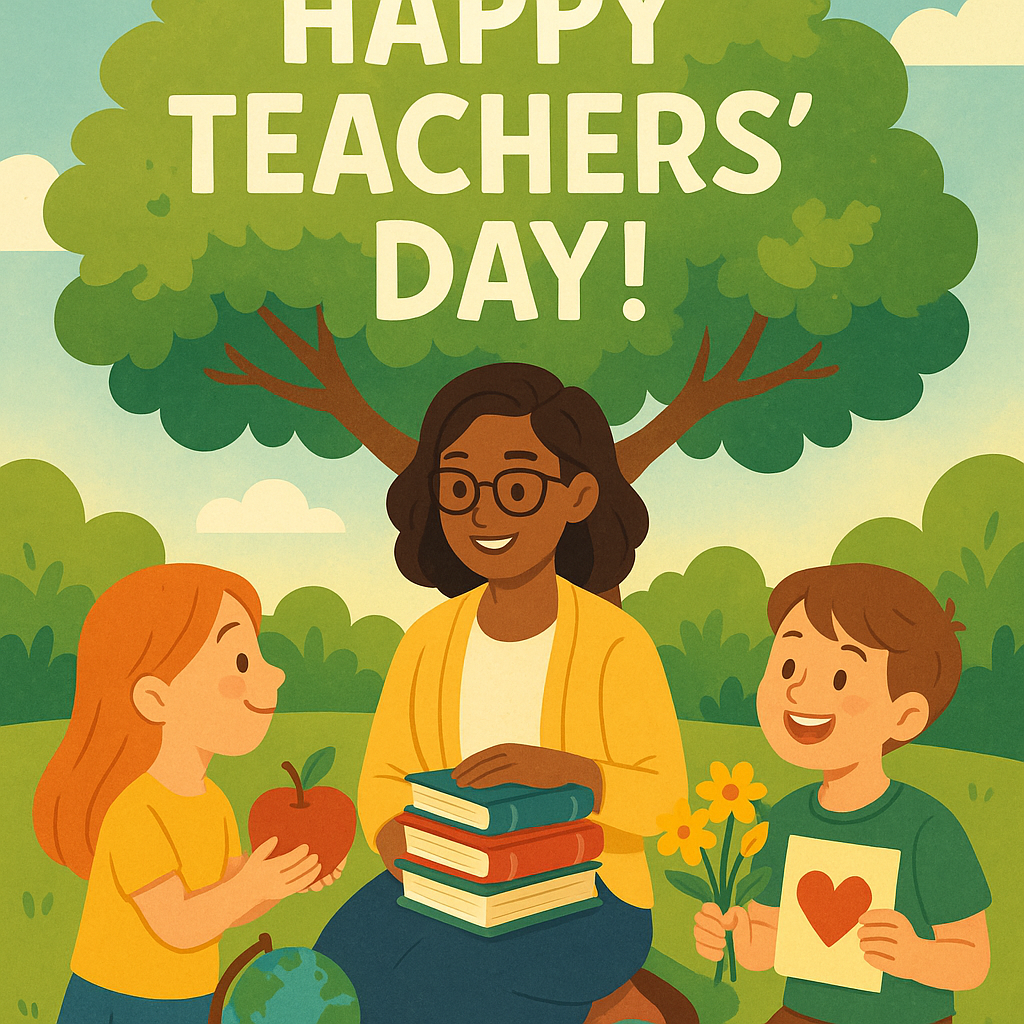

In [35]:
img = generate_image(image_prompt)
img

## **7) JSON Prompting**

**JSON Prompting** is a technique where you instruct an AI model to return its output in **JSON (JavaScript Object Notation)** format — a structured, machine-readable way of representing data.

Instead of producing free-flowing text, the model outputs information in a structured schema (with keys and values).

---

**Why JSON Prompting?**

- Ensures **consistent structure** for downstream systems.

- Makes it easy to **parse and integrate outputs** into software, dashboards, or APIs.

- Useful in **automation, reporting, and data pipelines**.

---

**Why it Works?**

The effectiveness of JSON Prompting it leverages how LLMs actually learn. During training, these models encounter millions of examples of structured data: API responses, configuration files, database schemas, and code documentation. JSON patterns are deeply embedded in their understanding.

JSON Prompting transforms AI from an unpredictable tool into a reliable system component. Teams can build automated workflows knowing that outputs will consistently match expected formats, reducing the need for complex error handling and manual intervention.

---

Consider the following example:

**Traditional Prompt:**
```
"Analyze this customer review and tell me about the sentiment"
```

**JSON Prompt:**
```
{
  "task": "sentiment_analysis",
  "input": "The product exceeded my expectations!",
  "output_format": {
    "sentiment": "positive|negative|neutral",
    "confidence": "0.0-1.0",
    "key_phrases": ["array", "of", "strings"],
    "summary": "brief explanation"
  }
}
```


In [36]:
# Json Prompt example

json_prompt = """{
  "task": "sentiment_analysis",
  "input": "The product exceeded my expectations!",
  "output_format": {
    "sentiment": "positive|negative|neutral",
    "confidence": "0.0-1.0",
    "key_phrases": ["array", "of", "strings"],
    "summary": "brief explanation"
  }
}"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": json_prompt}
    ]
)

In [37]:
output = response.choices[0].message.content
print(output)                       # <-- the output looks json but it is still a string

{
  "sentiment": "positive",
  "confidence": 0.95,
  "key_phrases": ["exceeded expectations", "product"],
  "summary": "The user expresses a highly positive sentiment towards the product, indicating it performed better than anticipated."
}


In [38]:
type(output)

str

In [39]:
# Convert the output string to Json (Python dictionary)

import json

parsed_output = json.loads(output)

type(parsed_output)

dict

In [40]:
# Now you can access fields like a dictionary
print(parsed_output["sentiment"])
print(parsed_output["confidence"])
print(parsed_output["key_phrases"])
print(parsed_output["summary"])

positive
0.95
['exceeded expectations', 'product']
The user expresses a highly positive sentiment towards the product, indicating it performed better than anticipated.


In [41]:
#@title Which prompt technique provides examples in the prompt? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "Few-shot prompting" #@param ["", "Zero-shot prompting", "Few-shot prompting", "Random prompting"]

In [42]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [43]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}

In [44]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [45]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [46]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [47]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2376
Date of submission:  10 Feb 2026
Time of submission:  22:25:29
View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions


# Ungraded task:

Create an **AI System** that can respond to customer and internal staff queries for a Flower Delivery Network.

<br>

<img src='https://drive.google.com/uc?id=1SFcrbz9nVcNHtMKUqQ18uBeKx1srOrY8' width=1000px>


**Intermediate steps:**

- **Create three different AI assistants**, each specializing in a different function of the flower delivery business:

    - **Order Support Assistant** – Handles customer issues like order status, delivery delays, bouquet customization, payment queries. (Use Role-based System prompts)

    - **Floral Expert Assistant** – Answers questions on flower types, care instructions, bouquet recommendations, seasonal availability.

    - **Logistics & Operations Assistant** – Handles driver routing, warehouse issues, delivery time estimates, packaging guidelines.

- **Route incoming user queries** to the correct assistant based on the nature of the question –
Order Support / Floral Expert / Operations.
(Use Few-shot examples + JSON classification prompting to determine the category.)
- **Test the system** using sample customer and staff queries, for example:

    - *Can I change the delivery time for my bouquet?*

    - *Which flowers last longest in hot weather?*

    - *A driver is stuck in traffic—what should be the updated delivery estimate?*


**References:**

- [Prompt Engineering Guide](https://www.promptingguide.ai/)

- [Is JSON Prompting a Good Strategy?](https://blog.promptlayer.com/is-json-prompting-a-good-strategy/)

- [Collection of Work Prompts](https://www.aiforwork.co/)